**test.csv :**  use this csv file to predict or test by using the trained model <br>
__train.csv :__  use this file to train and build a model <br>
__gender_submission :__  an example format of file to return submission for kaggle

In [1]:
# %matplotlib inline sets the backend of matplotlib to the 'inline' backend. 
# With this backend, the output of plottingcommands is displayed inline within frontends like JupyterNB
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb

import math 

import matplotlib.pyplot as plt

# Missing data visualization module for Python
import missingno

# Warnings are provided to warn the developer of situations that aren't necessarily exceptions.
# The warning module is actually a subclass of Exception which is a built-in class in Python
import warnings
# warnings. filterwarnings() to ignore deprecation warnings
# Deprecation warnings - indicate use of a library or feature is suspended & no longer considered safe to use
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
print(len(df))
print(df.shape)

print(df.dtypes)

df.head()
sum(df['Pclass'] == 1)

891
(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


216

So passengers in first class are more likely to survive coz death rate in `2nd class` is __52.7%__, `1st class` is __37%__, `3rd class` is __75.7%__

0    549
1    342
Name: Survived, dtype: int64

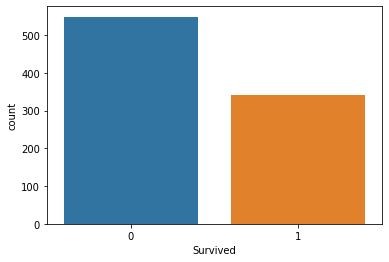

In [3]:
sb.countplot(data = df, x = df['Survived'])
df.Survived.value_counts()

In [4]:
pd.set_option('display.max_rows', 1000)
#df[df['Age'] <= 10]
len(df[(df['Age'] <= 20) & (df['Age'] > 10)])   # comparison - '&' is different from 'and'

115

In [5]:
x,y = 0,10
lst = []
for i in range(8):
    lst.append(len(df[(df['Age'] > x) & (df['Age'] <= y)]))
    x += 10
    y += 10
print(lst) 
lst
sum(lst)

[64, 115, 230, 155, 86, 42, 17, 5]


714

In [6]:
df["Age"].isnull().sum() 

177

In [7]:
ls = df[(df['Age'] > 0) & (df['Age'] <= 10)]
ls['Survived'].value_counts()

1    38
0    26
Name: Survived, dtype: int64

In [8]:
b = []
x,y = 0,10
for i in range(8):
    ls = df[(df['Age'] > x) & (df['Age'] <= y)]
    b.append(ls['Survived'].value_counts())
    x += 10
    y += 10
b

[1    38
 0    26
 Name: Survived, dtype: int64, 0    71
 1    44
 Name: Survived, dtype: int64, 0    146
 1     84
 Name: Survived, dtype: int64, 0    86
 1    69
 Name: Survived, dtype: int64, 0    53
 1    33
 Name: Survived, dtype: int64, 0    25
 1    17
 Name: Survived, dtype: int64, 0    13
 1     4
 Name: Survived, dtype: int64, 0    4
 1    1
 Name: Survived, dtype: int64]

In [9]:
b = []
x,y = 0,10
for i in range(8):
    ls = df[(df['Age'] > x) & (df['Age'] <= y)]
    b.append(list(ls['Survived'].value_counts().sort_index())) # .sort_index() - does not sort values while value_count
    x += 10
    y += 10
b

[[26, 38], [71, 44], [146, 84], [86, 69], [53, 33], [25, 17], [13, 4], [4, 1]]

In [10]:
x, y = [], []
for i in b:
  x.append(i[0])
  y.append(i[1])
x, y    

([26, 71, 146, 86, 53, 25, 13, 4], [38, 44, 84, 69, 33, 17, 4, 1])

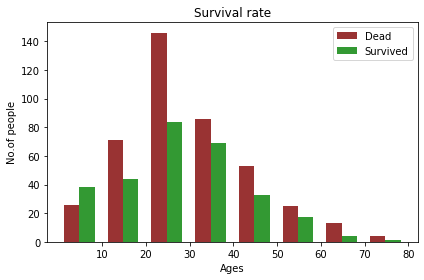

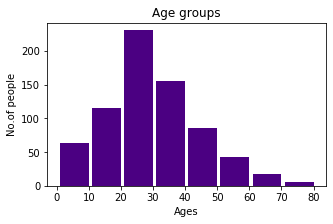

In [11]:
n_groups = 8
died = [26, 71, 146, 86, 53, 25, 13, 4]
survived = [38, 44, 84, 69, 33, 17, 4, 1]

# create plot
fig, ax = plt.subplots()    # 2, 2, figsize=(12, 8) - creates subplots side-by-side
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, died, bar_width,
alpha=opacity,
color='maroon',
label='Dead')

rects2 = plt.bar(index + bar_width, survived, bar_width,
alpha=opacity,
color='g',
label='Survived')

plt.xlabel('Ages')
plt.ylabel('No.of people')
plt.title('Survival rate')
plt.xticks(index + (bar_width * 2), (10,20,30,40,50,60,70,80))
plt.legend()

plt.tight_layout()
plt.show()



ages = [10,20,30,40,50,60,70,80]
fig = plt.figure(figsize = (5, 3)) 

plt.bar(ages, lst, color ='indigo', width = -9, align = 'edge')
plt.xlabel("Ages") 
plt.ylabel("No.of people") 
plt.title("Age groups") 
plt.show() 

In [12]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

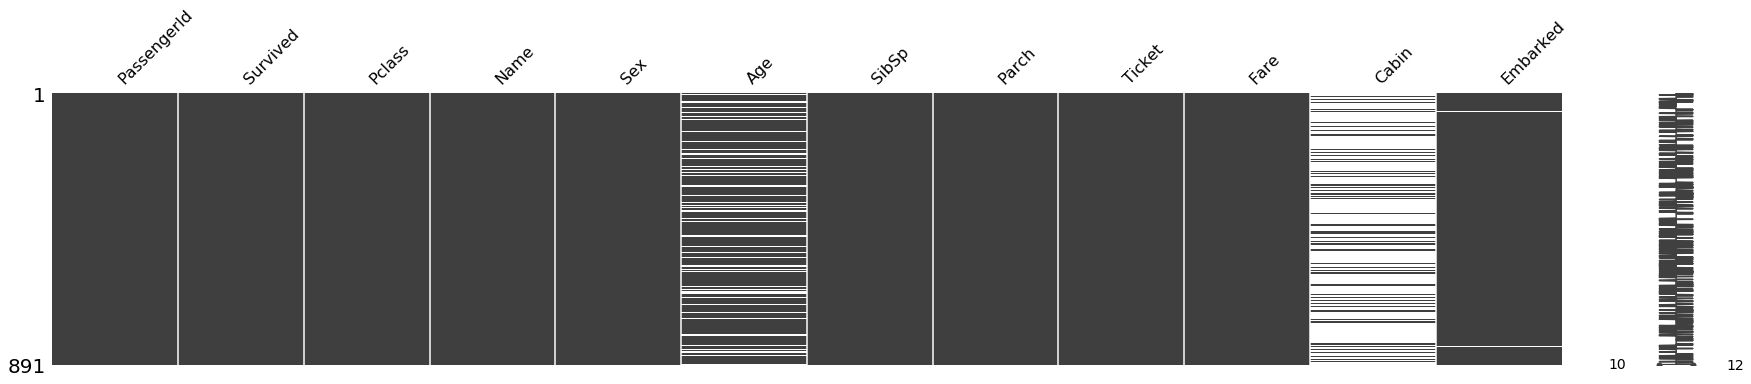

In [13]:
# shows the missing values or NaN in dataset
missingno.matrix(df, figsize = (30,5))

# Embarked : Port of Embarkation => C = Cherbourg, Q = Queenstown, S = Southampton

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

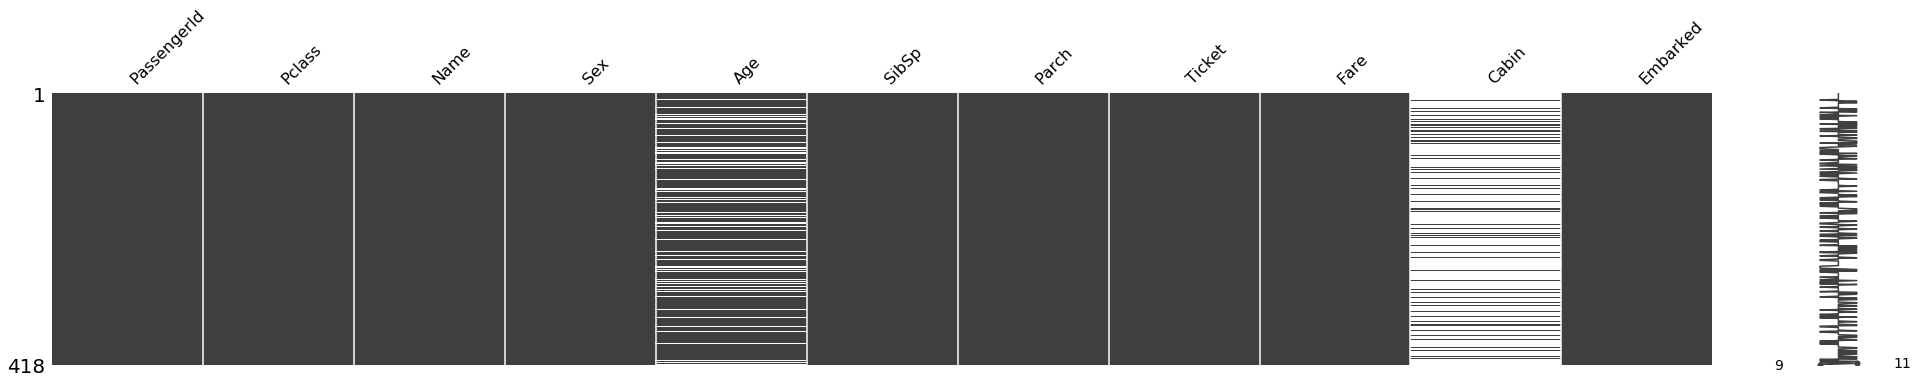

In [14]:
test = pd.read_csv('test.csv')
missingno.matrix(test, figsize = (33,5))
test.dtypes

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [18]:
df3 = df['Age']
idx = df3[df3<2].index

In [19]:
ages = df['Age']
df4 = df['Survived']
idx = df3[df3<2].index

all = df[df3<2]
all

PassengerId  Survived  Pclass                             Name     Sex  \
78            79         1       2    Caldwell, Master. Alden Gates    male   
164          165         0       3     Panula, Master. Eino Viljami    male   
172          173         1       3     Johnson, Miss. Eleanor Ileen  female   
183          184         1       2        Becker, Master. Richard F    male   
305          306         1       1   Allison, Master. Hudson Trevor    male   
381          382         1       3      Nakid, Miss. Maria ("Mary")  female   
386          387         0       3  Goodwin, Master. Sidney Leonard    male   
469          470         1       3    Baclini, Miss. Helene Barbara  female   
644          645         1       3           Baclini, Miss. Eugenie  female   
755          756         1       2        Hamalainen, Master. Viljo    male   
788          789         1       3       Dean, Master. Bertram Vere    male   
803          804         1       3  Thomas, Master. Assad Alexander    male   
827          828         1       2            Mallet, Master. Andre    male   
831          832         1       2  Richards, Master. George Sibley    male   

      Age  SibSp  Parch           Ticket      Fare    Cabin Embarked  
78   0.83      0      2           248738   29.0000      NaN        S  
164  1.00      4      1          3101295   39.6875      NaN        S  
172  1.00      1      1           347742   11.1333      NaN        S  
183  1.00      2      1           230136   39.0000       F4        S  
305  0.92      1      2           113781  151.5500  C22 C26        S  
381  1.00      0      2             2653   15.7417      NaN        C  
386  1.00      5      2          CA 2144   46.9000      NaN        S  
469  0.75      2      1             2666   19.2583      NaN        C  
644  0.75      2      1             2666   19.2583      NaN        C  
755  0.67      1      1           250649   14.5000      NaN        S  
788  1.00      1      2        C.A. 2315   20.5750      NaN        S  
803  0.42      0      1             2625    8.5167      NaN        C  
827  1.00      0      2  S.C./PARIS 2079   37.0042      NaN        C  
831  0.83      1      1            29106   18.7500      NaN        S

In [20]:
all['Survived'].value_counts()

1    12
0     2
Name: Survived, dtype: int64

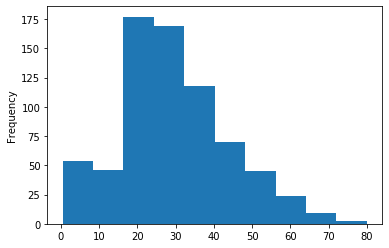

In [21]:
df.Age.plot.hist()

## Ages

([<matplotlib.axis.XTick at 0x1ab622e2bc8>,
 <a list of 10 Text xticklabel objects>)

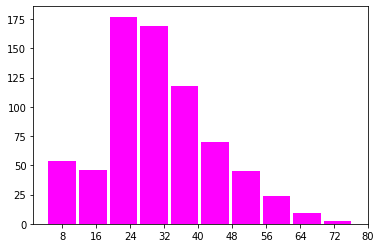

In [22]:
x = [8,16,24,32,40,48,56,64,72,80]
plt.hist(x, bins=10, weights=[54,  46, 177, 169, 118,  70,  45,  24,   9,   2], cumulative=False, bottom=None, histtype='bar', align='left', orientation='vertical', rwidth=0.9, log=False, color='magenta', label=None, stacked=False, data=None)
plt.xticks(x)

In [23]:
df3[df3<=2], df4[idx]           

(7      2.00
 16     2.00
 78     0.83
 119    2.00
 164    1.00
 172    1.00
 183    1.00
 205    2.00
 297    2.00
 305    0.92
 340    2.00
 381    1.00
 386    1.00
 469    0.75
 479    2.00
 530    2.00
 642    2.00
 644    0.75
 755    0.67
 788    1.00
 803    0.42
 824    2.00
 827    1.00
 831    0.83
 Name: Age, dtype: float64, 78     1
 164    0
 172    1
 183    1
 305    1
 381    1
 386    0
 469    1
 644    1
 755    1
 788    1
 803    1
 827    1
 831    1
 Name: Survived, dtype: int64)

In [24]:
#display = pd.options.display
#display.max_columns = 40
pd.set_option('display.max_rows',1000)

df["Age"].value_counts()
df5 = df["Survived"]
age = df[df5 == 1]
age["Age"].sort_values(ascending=True).value_counts()

24.00    15
27.00    11
22.00    11
35.00    11
36.00    11
30.00    10
18.00     9
32.00     9
19.00     9
31.00     8
29.00     8
4.00      7
28.00     7
40.00     6
42.00     6
34.00     6
33.00     6
16.00     6
17.00     6
26.00     6
25.00     6
48.00     6
38.00     5
3.00      5
1.00      5
21.00     5
39.00     5
23.00     5
45.00     5
50.00     5
15.00     4
49.00     4
5.00      4
20.00     3
14.00     3
44.00     3
58.00     3
2.00      3
52.00     3
54.00     3
13.00     2
0.75      2
8.00      2
0.83      2
41.00     2
6.00      2
51.00     2
56.00     2
60.00     2
62.00     2
63.00     2
9.00      2
11.00     1
7.00      1
0.92      1
12.00     1
37.00     1
43.00     1
47.00     1
53.00     1
55.00     1
80.00     1
0.42      1
0.67      1
32.50     1
Name: Age, dtype: int64

In [25]:
survive = df[df5 == 1]
survive
df['Age'].value_counts()
#df['Age'].isnull().sum()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
44.00     9
48.00     9
54.00     8
9.00      8
1.00      7
51.00     7
52.00     6
14.00     6
3.00      6
49.00     6
41.00     6
37.00     6
15.00     5
43.00     5
58.00     5
11.00     4
62.00     4
60.00     4
8.00      4
56.00     4
5.00      4
46.00     3
65.00     3
7.00      3
6.00      3
61.00     3
55.00     2
28.50     2
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.5

In [26]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [28]:
pd.set_option('display.max_rows',1000)
secClass = df['Pclass'] == 2
df2 = df[secClass]
print('Second_class :')
print(df2['Survived'].value_counts())

fstClass = df['Pclass'] == 1
df1 = df[fstClass]
print('\nFirst_class :')
print(df1['Survived'].value_counts())

trdClass = df['Pclass'] == 3
df3 = df[trdClass]
print('\nThird_class :')
print(df3['Survived'].value_counts())

Second_class :
0    97
1    87
Name: Survived, dtype: int64

First_class :
1    136
0     80
Name: Survived, dtype: int64

Third_class :
0    372
1    119
Name: Survived, dtype: int64


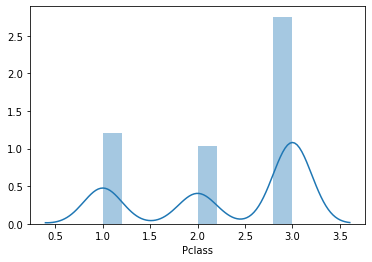

In [29]:
sb.distplot(df.Pclass)

In [30]:
# create separate dataframe for model training
df_model = pd.DataFrame()

In [31]:
pd.set_option('display.max_rows',1000)
df_model['Sex'] = df['Sex']
df_model

Sex
0      male
1    female
2    female
3    female
4      male
5      male
6      male
7      male
8    female
9    female
10   female
11   female
12     male
13     male
14   female
15   female
16     male
17     male
18   female
19   female
20     male
21     male
22   female
23     male
24   female
25   female
26     male
27     male
28   female
29     male
30     male
31   female
32   female
33     male
34     male
35     male
36     male
37     male
38   female
39   female
40   female
41   female
42     male
43   female
44   female
45     male
46     male
47   female
48     male
49   female
50     male
51     male
52   female
53   female
54     male
55     male
56   female
57     male
58   female
59     male
60     male
61   female
62     male
63     male
64     male
65     male
66   female
67     male
68   female
69     male
70     male
71   female
72     male
73     male
74     male
75     male
76     male
77     male
78     male
79   female
80     male
81     male
82   female
83     male
84   female
85   female
86     male
87     male
88   female
89     male
90     male
91     male
92     male
93     male
94     male
95     male
96     male
97     male
98   female
99     male
100  female
101    male
102    male
103    male
104    male
105    male
106  female
107    male
108    male
109  female
110    male
111  female
112    male
113  female
114  female
115    male
116    male
117    male
118    male
119  female
120    male
121    male
122    male
123  female
124    male
125    male
126    male
127    male
128  female
129    male
130    male
131    male
132  female
133  female
134    male
135    male
136  female
137    male
138    male
139    male
140  female
141  female
142  female
143    male
144    male
145    male
146    male
147  female
148    male
149    male
150    male
151  female
152    male
153    male
154    male
155    male
156  female
157    male
158    male
159    male
160    male
161  female
162    male
163    male
164    male
165    male
166  female
167  female
168    male
169    male
170    male
171    male
172  female
173    male
174    male
175    male
176    male
177  female
178    male
179    male
180  female
181    male
182    male
183    male
184  female
185    male
186  female
187    male
188    male
189    male
190  female
191    male
192  female
193    male
194  female
195  female
196    male
197    male
198  female
199  female
200    male
201    male
202    male
203    male
204    male
205  female
206    male
207    male
208  female
209    male
210    male
211  female
212    male
213    male
214    male
215  female
216  female
217    male
218  female
219    male
220    male
221    male
222    male
223    male
224    male
225    male
226    male
227    male
228    male
229  female
230  female
231    male
232    male
233  female
234    male
235  female
236    male
237  female
238    male
239    male
240  female
241  female
242    male
243    male
244    male
245    male
246  female
247  female
248    male
249    male
250    male
251  female
252    male
253    male
254  female
255  female
256  female
257  female
258  female
259  female
260    male
261    male
262    male
263    male
264  female
265    male
266    male
267    male
268  female
269  female
270    male
271    male
272  female
273    male
274  female
275  female
276  female
277    male
278    male
279  female
280    male
281    male
282    male
283    male
284    male
285    male
286    male
287    male
288    male
289  female
290  female
291  female
292    male
293  female
294    male
295    male
296    male
297  female
298    male
299  female
300  female
301    male
302    male
303  female
304    male
305    male
306  female
307  female
308    male
309  female
310  female
311  female
312  female
313    male
314    male
315  female
316  female
317    male
318  female
319  female
320    male
321    male
322  female
323  female
324    male
325  female
326    male
327  female
328  female
329  female
330  female
331    male
332    male


In [32]:
embarked_one_enc = pd.get_dummies(df['Embarked'], 
                                     prefix='embarked')

sex_one_enc = pd.get_dummies(df['Sex'], 
                                prefix='gender')

pclass_one_enc = pd.get_dummies(df['Pclass'], 
                                   prefix='pclass')

In [33]:
df_con_enc = pd.concat([df_model, 
                        embarked_one_enc, 
                        sex_one_enc, 
                        pclass_one_enc], axis=1)  
df_con_enc['Survived'] = df['Survived']
df_con_enc = df_con_enc.drop('Sex', axis = 1)

In [34]:
pd.cut(df['Age'], 10).value_counts().sort_index().values

array([ 54,  46, 177, 169, 118,  70,  45,  24,   9,   2], dtype=int64)

In [35]:
df_con_enc['Age'] = pd.cut(round(df['Age']), 10)
df_con_enc

embarked_C  embarked_Q  embarked_S  gender_female  gender_male  pclass_1  \
0             0           0           1              0            1         0   
1             1           0           0              1            0         1   
2             0           0           1              1            0         0   
3             0           0           1              1            0         1   
4             0           0           1              0            1         0   
5             0           1           0              0            1         0   
6             0           0           1              0            1         1   
7             0           0           1              0            1         0   
8             0           0           1              1            0         0   
9             1           0           0              1            0         0   
10            0           0           1              1            0         0   
11            0           0           1              1            0         1   
12            0           0           1              0            1         0   
13            0           0           1              0            1         0   
14            0           0           1              1            0         0   
15            0           0           1              1            0         0   
16            0           1           0              0            1         0   
17            0           0           1              0            1         0   
18            0           0           1              1            0         0   
19            1           0           0              1            0         0   
20            0           0           1              0            1         0   
21            0           0           1              0            1         0   
22            0           1           0              1            0         0   
23            0           0           1              0            1         1   
24            0           0           1              1            0         0   
25            0           0           1              1            0         0   
26            1           0           0              0            1         0   
27            0           0           1              0            1         1   
28            0           1           0              1            0         0   
29            0           0           1              0            1         0   
30            1           0           0              0            1         1   
31            1           0           0              1            0         1   
32            0           1           0              1            0         0   
33            0           0           1              0            1         0   
34            1           0           0              0            1         1   
35            0           0           1              0            1         1   
36            1           0           0              0            1         0   
37            0           0           1              0            1         0   
38            0           0           1              1            0         0   
39            1           0           0              1            0         0   
40            0           0           1              1            0         0   
41            0           0           1              1            0         0   
42            1           0           0              0            1         0   
43            1           0           0              1            0         0   
44            0           1           0              1            0         0   
45            0           0           1              0            1         0   
46            0           1           0              0            1         0   
47            0           1           0              1            0         0   
48            1           0         

In [36]:
df_con_enc.Age.unique()   # unique or value_counts()

[(16.0, 24.0], (32.0, 40.0], (24.0, 32.0], NaN, (48.0, 56.0], ..., (8.0, 16.0], (56.0, 64.0], (64.0, 72.0], (40.0, 48.0], (72.0, 80.0]]
Length: 11
Categories (10, interval[float64]): [(-0.08, 8.0] < (8.0, 16.0] < (16.0, 24.0] < (24.0, 32.0] ... (48.0, 56.0] < (56.0, 64.0] < (64.0, 72.0] < (72.0, 80.0]]

In [37]:
df.Fare.value_counts().sort_index()

0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
6.4500       1
6.4958       2
6.7500       2
6.8583       1
6.9500       1
6.9750       2
7.0458       1
7.0500       7
7.0542       2
7.1250       4
7.1417       1
7.2250      12
7.2292      15
7.2500      13
7.3125       1
7.4958       3
7.5208       1
7.5500       4
7.6292       1
7.6500       4
7.7250       1
7.7292       1
7.7333       4
7.7375       2
7.7417       1
7.7500      34
7.7750      16
7.7875       1
7.7958       6
7.8000       1
7.8292       2
7.8542      13
7.8750       1
7.8792       4
7.8875       1
7.8958      38
7.9250      18
8.0292       1
8.0500      43
8.1125       1
8.1375       1
8.1583       1
8.3000       1
8.3625       1
8.4042       1
8.4333       1
8.4583       1
8.5167       1
8.6542       1
8.6625      13
8.6833       1
8.7125       1
8.8500       1
9.0000       2
9.2167       1
9.2250       2
9.3500       2
9.4750       1
9.4833       1
9.5000       9
9.5875       2
9.8250    

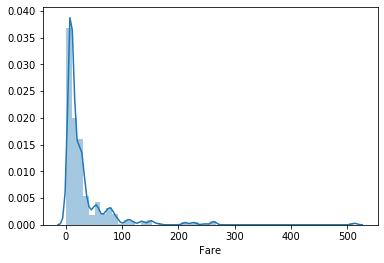

In [38]:
sb.distplot(df['Fare'])

In [39]:
df_con_enc['Fare'] = df['Fare']
df_con_enc

embarked_C  embarked_Q  embarked_S  gender_female  gender_male  pclass_1  \
0             0           0           1              0            1         0   
1             1           0           0              1            0         1   
2             0           0           1              1            0         0   
3             0           0           1              1            0         1   
4             0           0           1              0            1         0   
5             0           1           0              0            1         0   
6             0           0           1              0            1         1   
7             0           0           1              0            1         0   
8             0           0           1              1            0         0   
9             1           0           0              1            0         0   
10            0           0           1              1            0         0   
11            0           0           1              1            0         1   
12            0           0           1              0            1         0   
13            0           0           1              0            1         0   
14            0           0           1              1            0         0   
15            0           0           1              1            0         0   
16            0           1           0              0            1         0   
17            0           0           1              0            1         0   
18            0           0           1              1            0         0   
19            1           0           0              1            0         0   
20            0           0           1              0            1         0   
21            0           0           1              0            1         0   
22            0           1           0              1            0         0   
23            0           0           1              0            1         1   
24            0           0           1              1            0         0   
25            0           0           1              1            0         0   
26            1           0           0              0            1         0   
27            0           0           1              0            1         1   
28            0           1           0              1            0         0   
29            0           0           1              0            1         0   
30            1           0           0              0            1         1   
31            1           0           0              1            0         1   
32            0           1           0              1            0         0   
33            0           0           1              0            1         0   
34            1           0           0              0            1         1   
35            0           0           1              0            1         1   
36            1           0           0              0            1         0   
37            0           0           1              0            1         0   
38            0           0           1              1            0         0   
39            1           0           0              1            0         0   
40            0           0           1              1            0         0   
41            0           0           1              1            0         0   
42            1           0           0              0            1         0   
43            1           0           0              1            0         0   
44            0           1           0              1            0         0   
45            0           0           1              0            1         0   
46            0           1           0              0            1         0   
47            0           1           0              1            0         0   
48            1           0         

In [40]:
sur_1 = df_con_enc[df_con_enc['Survived'] == 1]

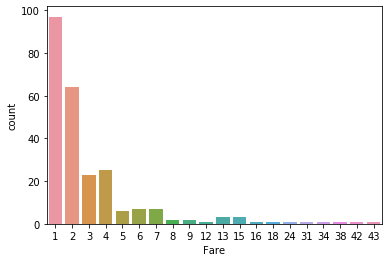

In [42]:
all = df.Fare.value_counts()
sb.countplot(all)

In [43]:
df.Fare.value_counts().sort_index()

0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
6.4500       1
6.4958       2
6.7500       2
6.8583       1
6.9500       1
6.9750       2
7.0458       1
7.0500       7
7.0542       2
7.1250       4
7.1417       1
7.2250      12
7.2292      15
7.2500      13
7.3125       1
7.4958       3
7.5208       1
7.5500       4
7.6292       1
7.6500       4
7.7250       1
7.7292       1
7.7333       4
7.7375       2
7.7417       1
7.7500      34
7.7750      16
7.7875       1
7.7958       6
7.8000       1
7.8292       2
7.8542      13
7.8750       1
7.8792       4
7.8875       1
7.8958      38
7.9250      18
8.0292       1
8.0500      43
8.1125       1
8.1375       1
8.1583       1
8.3000       1
8.3625       1
8.4042       1
8.4333       1
8.4583       1
8.5167       1
8.6542       1
8.6625      13
8.6833       1
8.7125       1
8.8500       1
9.0000       2
9.2167       1
9.2250       2
9.3500       2
9.4750       1
9.4833       1
9.5000       9
9.5875       2
9.8250    

In [44]:
df_con_enc

embarked_C  embarked_Q  embarked_S  gender_female  gender_male  pclass_1  \
0             0           0           1              0            1         0   
1             1           0           0              1            0         1   
2             0           0           1              1            0         0   
3             0           0           1              1            0         1   
4             0           0           1              0            1         0   
5             0           1           0              0            1         0   
6             0           0           1              0            1         1   
7             0           0           1              0            1         0   
8             0           0           1              1            0         0   
9             1           0           0              1            0         0   
10            0           0           1              1            0         0   
11            0           0           1              1            0         1   
12            0           0           1              0            1         0   
13            0           0           1              0            1         0   
14            0           0           1              1            0         0   
15            0           0           1              1            0         0   
16            0           1           0              0            1         0   
17            0           0           1              0            1         0   
18            0           0           1              1            0         0   
19            1           0           0              1            0         0   
20            0           0           1              0            1         0   
21            0           0           1              0            1         0   
22            0           1           0              1            0         0   
23            0           0           1              0            1         1   
24            0           0           1              1            0         0   
25            0           0           1              1            0         0   
26            1           0           0              0            1         0   
27            0           0           1              0            1         1   
28            0           1           0              1            0         0   
29            0           0           1              0            1         0   
30            1           0           0              0            1         1   
31            1           0           0              1            0         1   
32            0           1           0              1            0         0   
33            0           0           1              0            1         0   
34            1           0           0              0            1         1   
35            0           0           1              0            1         1   
36            1           0           0              0            1         0   
37            0           0           1              0            1         0   
38            0           0           1              1            0         0   
39            1           0           0              1            0         0   
40            0           0           1              1            0         0   
41            0           0           1              1            0         0   
42            1           0           0              0            1         0   
43            1           0           0              1            0         0   
44            0           1           0              1            0         0   
45            0           0           1              0            1         0   
46            0           1           0              0            1         0   
47            0           1           0              1            0         0   
48            1           0         

In [45]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [46]:
z = df[df['Parch'] == 3]
z.Survived.value_counts()

1    3
0    2
Name: Survived, dtype: int64

In [47]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [48]:
zi = df[df['SibSp'] == 1]
zi.Survived.value_counts()

1    112
0     97
Name: Survived, dtype: int64

In [49]:
df_con_enc['Parch'] = df['Parch']
df_con_enc['SibSp'] = df['SibSp']

df_con_enc

embarked_C  embarked_Q  embarked_S  gender_female  gender_male  pclass_1  \
0             0           0           1              0            1         0   
1             1           0           0              1            0         1   
2             0           0           1              1            0         0   
3             0           0           1              1            0         1   
4             0           0           1              0            1         0   
5             0           1           0              0            1         0   
6             0           0           1              0            1         1   
7             0           0           1              0            1         0   
8             0           0           1              1            0         0   
9             1           0           0              1            0         0   
10            0           0           1              1            0         0   
11            0           0           1              1            0         1   
12            0           0           1              0            1         0   
13            0           0           1              0            1         0   
14            0           0           1              1            0         0   
15            0           0           1              1            0         0   
16            0           1           0              0            1         0   
17            0           0           1              0            1         0   
18            0           0           1              1            0         0   
19            1           0           0              1            0         0   
20            0           0           1              0            1         0   
21            0           0           1              0            1         0   
22            0           1           0              1            0         0   
23            0           0           1              0            1         1   
24            0           0           1              1            0         0   
25            0           0           1              1            0         0   
26            1           0           0              0            1         0   
27            0           0           1              0            1         1   
28            0           1           0              1            0         0   
29            0           0           1              0            1         0   
30            1           0           0              0            1         1   
31            1           0           0              1            0         1   
32            0           1           0              1            0         0   
33            0           0           1              0            1         0   
34            1           0           0              0            1         1   
35            0           0           1              0            1         1   
36            1           0           0              0            1         0   
37            0           0           1              0            1         0   
38            0           0           1              1            0         0   
39            1           0           0              1            0         0   
40            0           0           1              1            0         0   
41            0           0           1              1            0         0   
42            1           0           0              0            1         0   
43            1           0           0              1            0         0   
44            0           1           0              1            0         0   
45            0           0           1              0            1         0   
46            0           1           0              0            1         0   
47            0           1           0              1            0         0   
48            1           0         

In [50]:
len(df.Ticket.value_counts())

681

In [51]:
df.Embarked.isnull().sum()
df.shape

(891, 12)

In [52]:
df = df.dropna(subset=['Embarked'])
df.shape

(889, 12)

In [53]:
tckts = df.Ticket.unique()
tckts_all = df.Ticket

print(len(tckts))
print(len(tckts_all))
tckts 

key = tckts_all
value = list(range(891))
tot = dict(zip(key, value))
tot
tot.keys()

680
889


dict_keys(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450', '330877', '17463', '349909', '347742', '237736', 'PP 9549', '113783', 'A/5. 2151', '347082', '350406', '248706', '382652', '244373', '345763', '2649', '239865', '248698', '330923', '113788', '347077', '2631', '19950', '330959', '349216', 'PC 17601', 'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677', 'A./5. 2152', '345764', '2651', '7546', '11668', '349253', 'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311', '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926', '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144', '2669', '36973', '347088', 'PC 17605', '2661', 'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111', 'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746', '248738', '364516', '345767', '345779', '330932', '113059', 'SO/C 14885', '3101278', 'W./C. 6608', 'SOTON/OQ 392086', '343275', '343276', '347466', 'W.E.P. 5734', 'C.A. 2315', '364500'

In [54]:
num = []
alp = []
count = 0
for tckt in tckts_all:
    if tckt.isnumeric():
        num.append(count)
    else:
        alp.append(count)
    count += 1
        
print(len(num))
print(len(alp))

alp
num


659
230


[3,
 4,
 5,
 6,
 7,
 8,
 9,
 11,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 32,
 35,
 36,
 38,
 39,
 40,
 41,
 42,
 44,
 46,
 47,
 48,
 49,
 50,
 53,
 54,
 55,
 57,
 60,
 61,
 62,
 64,
 67,
 68,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 84,
 87,
 88,
 89,
 90,
 93,
 94,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 115,
 116,
 118,
 121,
 122,
 123,
 124,
 125,
 127,
 128,
 129,
 132,
 135,
 136,
 137,
 139,
 140,
 142,
 143,
 145,
 147,
 148,
 150,
 155,
 157,
 159,
 161,
 162,
 163,
 164,
 165,
 166,
 168,
 169,
 170,
 171,
 173,
 174,
 175,
 177,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 195,
 196,
 197,
 198,
 199,
 201,
 202,
 204,
 205,
 206,
 207,
 208,
 212,
 213,
 214,
 216,
 217,
 220,
 221,
 222,
 223,
 227,
 228,
 229,
 230,
 231,
 232,
 235,
 237,
 239,
 240,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 253,
 254,
 256,
 25

0               A/5 21171
1                PC 17599
2        STON/O2. 3101282
10                PP 9549
12              A/5. 2151
30               PC 17601
31               PC 17569
33             C.A. 24579
34               PC 17604
37             A./5. 2152
43          SC/Paris 2123
45        S.C./A.4. 23567
51             A/4. 39886
52               PC 17572
56             C.A. 31026
58             C.A. 34651
59                CA 2144
63                 347088
65                   2661
66             C.A. 29395
69                 315151
70             C.A. 33111
71                CA 2144
83                 113059
85                3101278
86             W./C. 6608
91                 347466
92            W.E.P. 5734
95                 374910
96               PC 17754
114                  2627
117                 11668
119                347082
120          S.O.C. 14879
126                370372
130                349241
131    SOTON/O.Q. 3101307
133                228414
134         

In [56]:
df['Survived'][alp].value_counts()  # alp = 230

0    144
1     86
Name: Survived, dtype: int64

In [57]:
df['Survived'][num].value_counts()  # num = 661

0.0    404
1.0    253
Name: Survived, dtype: int64

In [58]:
df_con_enc['Ticket'] = df['Ticket']
df_con_enc

embarked_C  embarked_Q  embarked_S  gender_female  gender_male  pclass_1  \
0             0           0           1              0            1         0   
1             1           0           0              1            0         1   
2             0           0           1              1            0         0   
3             0           0           1              1            0         1   
4             0           0           1              0            1         0   
5             0           1           0              0            1         0   
6             0           0           1              0            1         1   
7             0           0           1              0            1         0   
8             0           0           1              1            0         0   
9             1           0           0              1            0         0   
10            0           0           1              1            0         0   
11            0           0           1              1            0         1   
12            0           0           1              0            1         0   
13            0           0           1              0            1         0   
14            0           0           1              1            0         0   
15            0           0           1              1            0         0   
16            0           1           0              0            1         0   
17            0           0           1              0            1         0   
18            0           0           1              1            0         0   
19            1           0           0              1            0         0   
20            0           0           1              0            1         0   
21            0           0           1              0            1         0   
22            0           1           0              1            0         0   
23            0           0           1              0            1         1   
24            0           0           1              1            0         0   
25            0           0           1              1            0         0   
26            1           0           0              0            1         0   
27            0           0           1              0            1         1   
28            0           1           0              1            0         0   
29            0           0           1              0            1         0   
30            1           0           0              0            1         1   
31            1           0           0              1            0         1   
32            0           1           0              1            0         0   
33            0           0           1              0            1         0   
34            1           0           0              0            1         1   
35            0           0           1              0            1         1   
36            1           0           0              0            1         0   
37            0           0           1              0            1         0   
38            0           0           1              1            0         0   
39            1           0           0              1            0         0   
40            0           0           1              1            0         0   
41            0           0           1              1            0         0   
42            1           0           0              0            1         0   
43            1           0           0              1            0         0   
44            0           1           0              1            0         0   
45            0           0           1              0            1         0   
46            0           1           0              0            1         0   
47            0           1           0              1            0         0   
48            1           0         

In [59]:
trained_T = df_con_enc.drop('Survived', axis=1)    # trained_T columns
survived_S = pd.DataFrame(df_con_enc['Survived'] )                   # survived_S column

trained_T
survived_S

print(survived_S.shape)
survived_S.head()

(891, 1)


Survived
0         0
1         1
2         1
3         1
4         0

In [60]:
print(trained_T.shape)
trained_T.head()

(891, 13)


embarked_C  embarked_Q  embarked_S  gender_female  gender_male  pclass_1  \
0           0           0           1              0            1         0   
1           1           0           0              1            0         1   
2           0           0           1              1            0         0   
3           0           0           1              1            0         1   
4           0           0           1              0            1         0   

   pclass_2  pclass_3           Age     Fare  Parch  SibSp            Ticket  
0         0         1  (16.0, 24.0]   7.2500      0      1         A/5 21171  
1         0         0  (32.0, 40.0]  71.2833      0      1          PC 17599  
2         0         1  (24.0, 32.0]   7.9250      0      0  STON/O2. 3101282  
3         0         0  (32.0, 40.0]  53.1000      0      1            113803  
4         0         1  (32.0, 40.0]   8.0500      0      0            373450

## Algorithms for Machine Learning

In [61]:
trained_T = df_con_enc.drop(['Age','Survived','Ticket'], axis=1)    # trained_T columns
trained_T

embarked_C  embarked_Q  embarked_S  gender_female  gender_male  pclass_1  \
0             0           0           1              0            1         0   
1             1           0           0              1            0         1   
2             0           0           1              1            0         0   
3             0           0           1              1            0         1   
4             0           0           1              0            1         0   
5             0           1           0              0            1         0   
6             0           0           1              0            1         1   
7             0           0           1              0            1         0   
8             0           0           1              1            0         0   
9             1           0           0              1            0         0   
10            0           0           1              1            0         0   
11            0           0           1              1            0         1   
12            0           0           1              0            1         0   
13            0           0           1              0            1         0   
14            0           0           1              1            0         0   
15            0           0           1              1            0         0   
16            0           1           0              0            1         0   
17            0           0           1              0            1         0   
18            0           0           1              1            0         0   
19            1           0           0              1            0         0   
20            0           0           1              0            1         0   
21            0           0           1              0            1         0   
22            0           1           0              1            0         0   
23            0           0           1              0            1         1   
24            0           0           1              1            0         0   
25            0           0           1              1            0         0   
26            1           0           0              0            1         0   
27            0           0           1              0            1         1   
28            0           1           0              1            0         0   
29            0           0           1              0            1         0   
30            1           0           0              0            1         1   
31            1           0           0              1            0         1   
32            0           1           0              1            0         0   
33            0           0           1              0            1         0   
34            1           0           0              0            1         1   
35            0           0           1              0            1         1   
36            1           0           0              0            1         0   
37            0           0           1              0            1         0   
38            0           0           1              1            0         0   
39            1           0           0              1            0         0   
40            0           0           1              1            0         0   
41            0           0           1              1            0         0   
42            1           0           0              0            1         0   
43            1           0           0              1            0         0   
44            0           1           0              1            0         0   
45            0           0           1              0            1         0   
46            0           1           0              0            1         0   
47            0           1           0              1            0         0   
48            1           0         

In [62]:
import time, random, datetime

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler

import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv


scaler = StandardScaler()

In [63]:
def fit_ml_algo(algo, trained_T, survived_S, cv):
    
    model = algo.fit(trained_T, survived_S)
    acc = round(model.score(trained_T, survived_S) * 100, 2)
    
    train_pred = model_selection.cross_val_predict(algo, 
                                                  trained_T, 
                                                  survived_S, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(survived_S, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [64]:
##  Logistic Regression  ##

start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               trained_T, 
                                                               survived_S, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 80.02
Accuracy CV 10-Fold: 79.46
Running Time: 0:00:03.632735


In [65]:
##  K-Nearest Neighbours  ##

start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  trained_T, 
                                                  survived_S, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.61
Accuracy CV 10-Fold: 76.99
Running Time: 0:00:00.211392


In [66]:
##  Gaussian Naive Bayes  ##

start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      trained_T, 
                                                                      survived_S, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.56
Accuracy CV 10-Fold: 78.11
Running Time: 0:00:00.063782


In [67]:
##  Linear Support Vector Machines-(SVC)  ##

start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                trained_T, 
                                                                survived_S, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 73.96
Accuracy CV 10-Fold: 75.08
Running Time: 0:00:00.423716


In [68]:
##  Stochastic Gradient Descent ##

start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  trained_T, 
                                                  survived_S,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 78.9
Accuracy CV 10-Fold: 68.69
Running Time: 0:00:00.087941


In [69]:
##  Decision Tree Classifier  ##

start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                trained_T, 
                                                                survived_S,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.48
Accuracy CV 10-Fold: 80.58
Running Time: 0:00:00.077799


In [70]:
##  Gradient Boosting Trees  ##

start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       trained_T, 
                                                                       survived_S,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.53
Accuracy CV 10-Fold: 81.03
Running Time: 0:00:00.745578


In [71]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
print("Accuracy Scores :")
models.sort_values(by='Score', ascending=False)

Accuracy Scores :


Model  Score
5               Decision Tree  92.48
6     Gradient Boosting Trees  86.53
0                         KNN  83.61
1         Logistic Regression  80.02
3  Stochastic Gradient Decent  78.90
2                 Naive Bayes  78.56
4                  Linear SVC  73.96

In [72]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt
    ]})
print('Cross validation Accuracy Scores :')
cv_models.sort_values(by='Score', ascending=False)

Cross validation Accuracy Scores :


Model  Score
6     Gradient Boosting Trees  81.03
5               Decision Tree  80.58
1         Logistic Regression  79.46
2                 Naive Bayes  78.11
0                         KNN  76.99
4                  Linear SVC  75.08
3  Stochastic Gradient Decent  68.69

In [73]:
trained_T.head()

embarked_C  embarked_Q  embarked_S  gender_female  gender_male  pclass_1  \
0           0           0           1              0            1         0   
1           1           0           0              1            0         1   
2           0           0           1              1            0         0   
3           0           0           1              1            0         1   
4           0           0           1              0            1         0   

   pclass_2  pclass_3     Fare  Parch  SibSp  
0         0         1   7.2500      0      1  
1         0         0  71.2833      0      1  
2         0         1   7.9250      0      0  
3         0         0  53.1000      0      1  
4         0         1   8.0500      0      0

In [74]:
test = pd.read_csv('test.csv')
test

PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jones, Mr. Charles Cresson   
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13           905       2                               Howard, Mr. Benjamin   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15           907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16           908       2                                  Keane, Mr. Daniel   
17           909       3                                  Assaf, Mr. Gerios   
18           910       3                       Ilmakangas, Miss. Ida Livija   
19           911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   
20           912       1                             Rothschild, Mr. Martin   
21           913       3                          Olsen, Master. Artur Karl   
22           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
23           915       1                    Williams, Mr. Richard Norris II   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
25           917       3                            Robins, Mr. Alexander A   
26           918       1                       Ostby, Miss. Helene Ragnhild   
27           919       3                                  Daher, Mr. Shedid   
28           920       1                            Brady, Mr. John Bertram   
29           921       3                                  Samaan, Mr. Elias   
30           922       2                       Louch, Mr. Charles Alexander   
31           923       2                      Jefferys, Mr. Clifford Thomas   
32           924       3           Dean, Mrs. Bertram (Eva Georgetta Light)   
33           925       3  Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"   
34           926       1                           Mock, Mr. Philipp Edmund   
35           927       3   Katavelas, Mr. Vassilios (Catavelas Vassilios")"   
36           928       3                                Roth, Miss. Sarah A   
37           929       3                                 Cacic, Miss. Manda   
38           930       3                                    Sap, Mr. Julius   
39           931       3                                      Hee, Mr. Ling   
40           932       3                                   Karun, Mr. Franz   
41           933       1                        Franklin, Mr. Thomas Parham   
42           934       3                              Goldsmith, Mr. Nathan   
43           935       2              Corbett, Mrs. Walter H (Irene Colvin)   
44           936       1   Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)   
45           937       3                    Peltomaki, Mr. Nikolai Johannes   
46           938       1                           Chevre, Mr. Paul Romaine   
47           939       3                           Shaughnessy, Mr. Patrick   
48           940       1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
49           941       3     Coutts, Mrs. William (Winn

In [75]:
cat_features = np.where(trained_T.dtypes != np.float)[0]
cat_features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10], dtype=int64)

In [76]:
train_pool = Pool(trained_T, 
                  survived_S,
                  cat_features)

In [77]:
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(trained_T, survived_S) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009807
0:	learn: 0.6868103	total: 110ms	remaining: 1m 49s
1:	learn: 0.6806293	total: 117ms	remaining: 58.3s
2:	learn: 0.6753557	total: 124ms	remaining: 41.3s
3:	learn: 0.6692166	total: 136ms	remaining: 34s
4:	learn: 0.6630875	total: 149ms	remaining: 29.6s
5:	learn: 0.6597874	total: 152ms	remaining: 25.1s
6:	learn: 0.6550199	total: 158ms	remaining: 22.4s
7:	learn: 0.6503019	total: 170ms	remaining: 21.1s
8:	learn: 0.6449496	total: 178ms	remaining: 19.6s
9:	learn: 0.6396476	total: 186ms	remaining: 18.5s
10:	learn: 0.6352667	total: 193ms	remaining: 17.3s
11:	learn: 0.6324140	total: 195ms	remaining: 16s
12:	learn: 0.6294447	total: 197ms	remaining: 15s
13:	learn: 0.6267122	total: 199ms	remaining: 14s
14:	learn: 0.6240021	total: 201ms	remaining: 13.2s
15:	learn: 0.6213497	total: 204ms	remaining: 12.5s
16:	learn: 0.6169438	total: 209ms	remaining: 12.1s
17:	learn: 0.6131688	total: 213ms	remaining: 11.6s
18:	learn: 0.6094911	total: 220ms	remaining: 11.3s
19:	learn: 0.60512

163:	learn: 0.4216641	total: 1.09s	remaining: 5.54s
164:	learn: 0.4213244	total: 1.11s	remaining: 5.61s
165:	learn: 0.4207692	total: 1.12s	remaining: 5.62s
166:	learn: 0.4206127	total: 1.13s	remaining: 5.63s
167:	learn: 0.4198708	total: 1.14s	remaining: 5.65s
168:	learn: 0.4196438	total: 1.15s	remaining: 5.64s
169:	learn: 0.4194480	total: 1.15s	remaining: 5.62s
170:	learn: 0.4191452	total: 1.16s	remaining: 5.61s
171:	learn: 0.4186440	total: 1.17s	remaining: 5.62s
172:	learn: 0.4181028	total: 1.18s	remaining: 5.63s
173:	learn: 0.4180855	total: 1.18s	remaining: 5.6s
174:	learn: 0.4179358	total: 1.19s	remaining: 5.59s
175:	learn: 0.4177563	total: 1.19s	remaining: 5.57s
176:	learn: 0.4174856	total: 1.2s	remaining: 5.57s
177:	learn: 0.4173922	total: 1.2s	remaining: 5.54s
178:	learn: 0.4173766	total: 1.2s	remaining: 5.51s
179:	learn: 0.4171498	total: 1.21s	remaining: 5.49s
180:	learn: 0.4165187	total: 1.21s	remaining: 5.49s
181:	learn: 0.4162866	total: 1.22s	remaining: 5.48s
182:	learn: 0.41

331:	learn: 0.3927222	total: 2.17s	remaining: 4.36s
332:	learn: 0.3924228	total: 2.17s	remaining: 4.36s
333:	learn: 0.3923248	total: 2.19s	remaining: 4.36s
334:	learn: 0.3922523	total: 2.19s	remaining: 4.36s
335:	learn: 0.3922515	total: 2.2s	remaining: 4.34s
336:	learn: 0.3922038	total: 2.21s	remaining: 4.34s
337:	learn: 0.3919868	total: 2.21s	remaining: 4.33s
338:	learn: 0.3919467	total: 2.22s	remaining: 4.32s
339:	learn: 0.3917546	total: 2.22s	remaining: 4.31s
340:	learn: 0.3917524	total: 2.22s	remaining: 4.3s
341:	learn: 0.3917352	total: 2.23s	remaining: 4.29s
342:	learn: 0.3915824	total: 2.24s	remaining: 4.28s
343:	learn: 0.3915099	total: 2.25s	remaining: 4.29s
344:	learn: 0.3913672	total: 2.25s	remaining: 4.27s
345:	learn: 0.3913231	total: 2.26s	remaining: 4.26s
346:	learn: 0.3911945	total: 2.26s	remaining: 4.26s
347:	learn: 0.3911941	total: 2.27s	remaining: 4.25s
348:	learn: 0.3911937	total: 2.27s	remaining: 4.23s
349:	learn: 0.3910509	total: 2.28s	remaining: 4.23s
350:	learn: 0.

491:	learn: 0.3788323	total: 3.04s	remaining: 3.14s
492:	learn: 0.3787216	total: 3.04s	remaining: 3.13s
493:	learn: 0.3787148	total: 3.04s	remaining: 3.12s
494:	learn: 0.3787035	total: 3.05s	remaining: 3.11s
495:	learn: 0.3787034	total: 3.05s	remaining: 3.1s
496:	learn: 0.3786255	total: 3.06s	remaining: 3.1s
497:	learn: 0.3786255	total: 3.06s	remaining: 3.08s
498:	learn: 0.3785012	total: 3.06s	remaining: 3.08s
499:	learn: 0.3783634	total: 3.07s	remaining: 3.07s
500:	learn: 0.3783356	total: 3.07s	remaining: 3.06s
501:	learn: 0.3783060	total: 3.08s	remaining: 3.06s
502:	learn: 0.3782862	total: 3.08s	remaining: 3.04s
503:	learn: 0.3782139	total: 3.09s	remaining: 3.04s
504:	learn: 0.3782114	total: 3.1s	remaining: 3.03s
505:	learn: 0.3781232	total: 3.1s	remaining: 3.02s
506:	learn: 0.3780823	total: 3.1s	remaining: 3.02s
507:	learn: 0.3779758	total: 3.11s	remaining: 3.01s
508:	learn: 0.3778289	total: 3.12s	remaining: 3.01s
509:	learn: 0.3777653	total: 3.12s	remaining: 3s
510:	learn: 0.377733

686:	learn: 0.3641128	total: 4.11s	remaining: 1.87s
687:	learn: 0.3641125	total: 4.11s	remaining: 1.86s
688:	learn: 0.3640780	total: 4.11s	remaining: 1.85s
689:	learn: 0.3640650	total: 4.11s	remaining: 1.85s
690:	learn: 0.3639092	total: 4.12s	remaining: 1.84s
691:	learn: 0.3638379	total: 4.13s	remaining: 1.84s
692:	learn: 0.3637630	total: 4.14s	remaining: 1.83s
693:	learn: 0.3636823	total: 4.14s	remaining: 1.83s
694:	learn: 0.3636249	total: 4.15s	remaining: 1.82s
695:	learn: 0.3636009	total: 4.15s	remaining: 1.81s
696:	learn: 0.3635109	total: 4.16s	remaining: 1.81s
697:	learn: 0.3635077	total: 4.17s	remaining: 1.8s
698:	learn: 0.3633995	total: 4.18s	remaining: 1.8s
699:	learn: 0.3633869	total: 4.18s	remaining: 1.79s
700:	learn: 0.3633745	total: 4.18s	remaining: 1.78s
701:	learn: 0.3633496	total: 4.19s	remaining: 1.78s
702:	learn: 0.3632349	total: 4.19s	remaining: 1.77s
703:	learn: 0.3631986	total: 4.2s	remaining: 1.77s
704:	learn: 0.3631112	total: 4.21s	remaining: 1.76s
705:	learn: 0.3

864:	learn: 0.3516953	total: 5.36s	remaining: 836ms
865:	learn: 0.3515793	total: 5.37s	remaining: 831ms
866:	learn: 0.3515209	total: 5.38s	remaining: 826ms
867:	learn: 0.3514625	total: 5.39s	remaining: 820ms
868:	learn: 0.3513499	total: 5.4s	remaining: 814ms
869:	learn: 0.3513410	total: 5.41s	remaining: 808ms
870:	learn: 0.3512900	total: 5.41s	remaining: 802ms
871:	learn: 0.3512775	total: 5.42s	remaining: 795ms
872:	learn: 0.3511734	total: 5.42s	remaining: 789ms
873:	learn: 0.3511172	total: 5.43s	remaining: 783ms
874:	learn: 0.3510839	total: 5.44s	remaining: 777ms
875:	learn: 0.3510178	total: 5.45s	remaining: 771ms
876:	learn: 0.3509807	total: 5.46s	remaining: 765ms
877:	learn: 0.3508312	total: 5.47s	remaining: 761ms
878:	learn: 0.3508037	total: 5.48s	remaining: 755ms
879:	learn: 0.3507384	total: 5.49s	remaining: 749ms
880:	learn: 0.3506723	total: 5.5s	remaining: 744ms
881:	learn: 0.3506248	total: 5.51s	remaining: 738ms
882:	learn: 0.3506138	total: 5.52s	remaining: 731ms
883:	learn: 0.

In [78]:
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6741129	test: 0.6749802	best: 0.6749802 (0)	total: 2.96s	remaining: 49m 16s
1:	learn: 0.6565272	test: 0.6579426	best: 0.6579426 (1)	total: 6.07s	remaining: 50m 27s
2:	learn: 0.6403608	test: 0.6428246	best: 0.6428246 (2)	total: 9.24s	remaining: 51m 11s
3:	learn: 0.6261622	test: 0.6292293	best: 0.6292293 (3)	total: 12.7s	remaining: 52m 44s
4:	learn: 0.6112756	test: 0.6154105	best: 0.6154105 (4)	total: 15.9s	remaining: 52m 46s
5:	learn: 0.5973814	test: 0.6028147	best: 0.6028147 (5)	total: 18.9s	remaining: 52m 15s
6:	learn: 0.5861539	test: 0.5923732	best: 0.5923732 (6)	total: 22.2s	remaining: 52m 34s
7:	learn: 0.5756790	test: 0.5829759	best: 0.5829759 (7)	total: 25.6s	remaining: 52m 49s
8:	learn: 0.5651586	test: 0.5728363	best: 0.5728363 (8)	total: 28.7s	remaining: 52m 37s
9:	learn: 0.5565664	test: 0.5648051	best: 0.5648051 (9)	total: 32s	remaining: 52m 44s
10:	learn: 0.5482012	test: 0.5564610	best: 0.5564610 (10)	total: 35.3s	remaining: 52m 50s
11:	learn: 0.5415909	test: 0.550

91:	learn: 0.3937436	test: 0.4452473	best: 0.4452473 (91)	total: 4m 52s	remaining: 48m 2s
92:	learn: 0.3935168	test: 0.4451716	best: 0.4451716 (92)	total: 4m 55s	remaining: 47m 59s
93:	learn: 0.3933489	test: 0.4451373	best: 0.4451373 (93)	total: 4m 58s	remaining: 47m 54s
94:	learn: 0.3930322	test: 0.4450378	best: 0.4450378 (94)	total: 5m 1s	remaining: 47m 49s
95:	learn: 0.3926459	test: 0.4451057	best: 0.4450378 (94)	total: 5m 4s	remaining: 47m 45s
96:	learn: 0.3920125	test: 0.4448819	best: 0.4448819 (96)	total: 5m 7s	remaining: 47m 44s
97:	learn: 0.3916852	test: 0.4448152	best: 0.4448152 (97)	total: 5m 10s	remaining: 47m 40s
98:	learn: 0.3913142	test: 0.4446490	best: 0.4446490 (98)	total: 5m 13s	remaining: 47m 36s
99:	learn: 0.3908795	test: 0.4445206	best: 0.4445206 (99)	total: 5m 16s	remaining: 47m 31s
100:	learn: 0.3906140	test: 0.4444240	best: 0.4444240 (100)	total: 5m 20s	remaining: 47m 28s
101:	learn: 0.3902357	test: 0.4444978	best: 0.4444240 (100)	total: 5m 23s	remaining: 47m 25s

180:	learn: 0.3674235	test: 0.4415271	best: 0.4414872 (179)	total: 9m 33s	remaining: 43m 15s
181:	learn: 0.3672503	test: 0.4415457	best: 0.4414872 (179)	total: 9m 36s	remaining: 43m 10s
182:	learn: 0.3669693	test: 0.4415425	best: 0.4414872 (179)	total: 9m 39s	remaining: 43m 8s
183:	learn: 0.3666251	test: 0.4416206	best: 0.4414872 (179)	total: 9m 42s	remaining: 43m 4s
184:	learn: 0.3664647	test: 0.4416625	best: 0.4414872 (179)	total: 9m 45s	remaining: 43m
185:	learn: 0.3662386	test: 0.4417645	best: 0.4414872 (179)	total: 9m 48s	remaining: 42m 56s
186:	learn: 0.3659659	test: 0.4418192	best: 0.4414872 (179)	total: 9m 52s	remaining: 42m 54s
187:	learn: 0.3656682	test: 0.4418727	best: 0.4414872 (179)	total: 9m 55s	remaining: 42m 52s
188:	learn: 0.3654926	test: 0.4418993	best: 0.4414872 (179)	total: 9m 58s	remaining: 42m 49s
189:	learn: 0.3652384	test: 0.4418755	best: 0.4414872 (179)	total: 10m 2s	remaining: 42m 47s
190:	learn: 0.3649354	test: 0.4418759	best: 0.4414872 (179)	total: 10m 5s	re

268:	learn: 0.3475056	test: 0.4444116	best: 0.4414872 (179)	total: 14m 15s	remaining: 38m 43s
269:	learn: 0.3472484	test: 0.4445070	best: 0.4414872 (179)	total: 14m 18s	remaining: 38m 40s
270:	learn: 0.3469488	test: 0.4445455	best: 0.4414872 (179)	total: 14m 21s	remaining: 38m 36s
271:	learn: 0.3467547	test: 0.4445244	best: 0.4414872 (179)	total: 14m 24s	remaining: 38m 34s
272:	learn: 0.3464783	test: 0.4444458	best: 0.4414872 (179)	total: 14m 27s	remaining: 38m 30s
273:	learn: 0.3462702	test: 0.4444713	best: 0.4414872 (179)	total: 14m 30s	remaining: 38m 27s
274:	learn: 0.3460442	test: 0.4446122	best: 0.4414872 (179)	total: 14m 36s	remaining: 38m 29s
275:	learn: 0.3456571	test: 0.4447820	best: 0.4414872 (179)	total: 14m 44s	remaining: 38m 40s
276:	learn: 0.3453973	test: 0.4448090	best: 0.4414872 (179)	total: 14m 47s	remaining: 38m 37s
277:	learn: 0.3451545	test: 0.4448820	best: 0.4414872 (179)	total: 14m 51s	remaining: 38m 36s
278:	learn: 0.3448186	test: 0.4448204	best: 0.4414872 (179)	

356:	learn: 0.3243695	test: 0.4472707	best: 0.4414872 (179)	total: 19m 12s	remaining: 34m 35s
357:	learn: 0.3241648	test: 0.4472362	best: 0.4414872 (179)	total: 19m 15s	remaining: 34m 32s
358:	learn: 0.3239869	test: 0.4471719	best: 0.4414872 (179)	total: 19m 19s	remaining: 34m 29s
359:	learn: 0.3237084	test: 0.4470832	best: 0.4414872 (179)	total: 19m 22s	remaining: 34m 25s
360:	learn: 0.3235035	test: 0.4470587	best: 0.4414872 (179)	total: 19m 26s	remaining: 34m 24s
361:	learn: 0.3232471	test: 0.4471266	best: 0.4414872 (179)	total: 19m 29s	remaining: 34m 21s
362:	learn: 0.3229845	test: 0.4470948	best: 0.4414872 (179)	total: 19m 32s	remaining: 34m 18s
363:	learn: 0.3227590	test: 0.4471736	best: 0.4414872 (179)	total: 19m 36s	remaining: 34m 15s
364:	learn: 0.3225325	test: 0.4473798	best: 0.4414872 (179)	total: 19m 39s	remaining: 34m 12s
365:	learn: 0.3222589	test: 0.4475103	best: 0.4414872 (179)	total: 19m 43s	remaining: 34m 9s
366:	learn: 0.3220655	test: 0.4475273	best: 0.4414872 (179)	t

444:	learn: 0.3034212	test: 0.4474776	best: 0.4414872 (179)	total: 24m 4s	remaining: 30m 2s
445:	learn: 0.3032327	test: 0.4474767	best: 0.4414872 (179)	total: 24m 8s	remaining: 29m 58s
446:	learn: 0.3030220	test: 0.4475148	best: 0.4414872 (179)	total: 24m 11s	remaining: 29m 55s
447:	learn: 0.3028611	test: 0.4474177	best: 0.4414872 (179)	total: 24m 14s	remaining: 29m 52s
448:	learn: 0.3027009	test: 0.4473117	best: 0.4414872 (179)	total: 24m 17s	remaining: 29m 49s
449:	learn: 0.3024725	test: 0.4473314	best: 0.4414872 (179)	total: 24m 21s	remaining: 29m 46s
450:	learn: 0.3022315	test: 0.4475865	best: 0.4414872 (179)	total: 24m 24s	remaining: 29m 42s
451:	learn: 0.3020288	test: 0.4476807	best: 0.4414872 (179)	total: 24m 27s	remaining: 29m 39s
452:	learn: 0.3018339	test: 0.4477994	best: 0.4414872 (179)	total: 24m 30s	remaining: 29m 36s
453:	learn: 0.3016030	test: 0.4477607	best: 0.4414872 (179)	total: 24m 34s	remaining: 29m 33s
454:	learn: 0.3013983	test: 0.4477724	best: 0.4414872 (179)	tot

532:	learn: 0.2866634	test: 0.4505924	best: 0.4414872 (179)	total: 28m 54s	remaining: 25m 19s
533:	learn: 0.2865026	test: 0.4505773	best: 0.4414872 (179)	total: 28m 57s	remaining: 25m 16s
534:	learn: 0.2863298	test: 0.4504716	best: 0.4414872 (179)	total: 29m	remaining: 25m 13s
535:	learn: 0.2861914	test: 0.4505065	best: 0.4414872 (179)	total: 29m 4s	remaining: 25m 10s
536:	learn: 0.2860438	test: 0.4505028	best: 0.4414872 (179)	total: 29m 7s	remaining: 25m 6s
537:	learn: 0.2857893	test: 0.4505446	best: 0.4414872 (179)	total: 29m 10s	remaining: 25m 3s
538:	learn: 0.2855968	test: 0.4506462	best: 0.4414872 (179)	total: 29m 14s	remaining: 25m
539:	learn: 0.2854465	test: 0.4505756	best: 0.4414872 (179)	total: 29m 17s	remaining: 24m 57s
540:	learn: 0.2852961	test: 0.4505642	best: 0.4414872 (179)	total: 29m 21s	remaining: 24m 54s
541:	learn: 0.2851246	test: 0.4505367	best: 0.4414872 (179)	total: 29m 24s	remaining: 24m 51s
542:	learn: 0.2849324	test: 0.4505792	best: 0.4414872 (179)	total: 29m 2

620:	learn: 0.2721199	test: 0.4511565	best: 0.4414872 (179)	total: 33m 53s	remaining: 20m 41s
621:	learn: 0.2719379	test: 0.4512751	best: 0.4414872 (179)	total: 33m 56s	remaining: 20m 37s
622:	learn: 0.2717801	test: 0.4513106	best: 0.4414872 (179)	total: 34m	remaining: 20m 34s
623:	learn: 0.2716427	test: 0.4512785	best: 0.4414872 (179)	total: 34m 3s	remaining: 20m 31s
624:	learn: 0.2714748	test: 0.4512744	best: 0.4414872 (179)	total: 34m 7s	remaining: 20m 28s
625:	learn: 0.2713509	test: 0.4513102	best: 0.4414872 (179)	total: 34m 11s	remaining: 20m 25s
626:	learn: 0.2711953	test: 0.4513637	best: 0.4414872 (179)	total: 34m 14s	remaining: 20m 22s
627:	learn: 0.2710214	test: 0.4513760	best: 0.4414872 (179)	total: 34m 18s	remaining: 20m 19s
628:	learn: 0.2708457	test: 0.4514078	best: 0.4414872 (179)	total: 34m 21s	remaining: 20m 16s
629:	learn: 0.2707240	test: 0.4516094	best: 0.4414872 (179)	total: 34m 25s	remaining: 20m 12s
630:	learn: 0.2705742	test: 0.4515543	best: 0.4414872 (179)	total:

708:	learn: 0.2595178	test: 0.4544952	best: 0.4414872 (179)	total: 39m 6s	remaining: 16m 3s
709:	learn: 0.2593982	test: 0.4545578	best: 0.4414872 (179)	total: 39m 9s	remaining: 15m 59s
710:	learn: 0.2592469	test: 0.4545268	best: 0.4414872 (179)	total: 39m 13s	remaining: 15m 56s
711:	learn: 0.2591115	test: 0.4545073	best: 0.4414872 (179)	total: 39m 16s	remaining: 15m 53s
712:	learn: 0.2589969	test: 0.4545155	best: 0.4414872 (179)	total: 39m 19s	remaining: 15m 49s
713:	learn: 0.2588697	test: 0.4544513	best: 0.4414872 (179)	total: 39m 22s	remaining: 15m 46s
714:	learn: 0.2587623	test: 0.4543917	best: 0.4414872 (179)	total: 39m 26s	remaining: 15m 43s
715:	learn: 0.2586155	test: 0.4543509	best: 0.4414872 (179)	total: 39m 30s	remaining: 15m 40s
716:	learn: 0.2584723	test: 0.4543819	best: 0.4414872 (179)	total: 39m 33s	remaining: 15m 36s
717:	learn: 0.2583570	test: 0.4543632	best: 0.4414872 (179)	total: 39m 36s	remaining: 15m 33s
718:	learn: 0.2582022	test: 0.4543038	best: 0.4414872 (179)	tot

796:	learn: 0.2481264	test: 0.4572318	best: 0.4414872 (179)	total: 44m 23s	remaining: 11m 18s
797:	learn: 0.2480288	test: 0.4572235	best: 0.4414872 (179)	total: 44m 27s	remaining: 11m 15s
798:	learn: 0.2479216	test: 0.4572222	best: 0.4414872 (179)	total: 44m 30s	remaining: 11m 11s
799:	learn: 0.2478111	test: 0.4573329	best: 0.4414872 (179)	total: 44m 33s	remaining: 11m 8s
800:	learn: 0.2477140	test: 0.4572980	best: 0.4414872 (179)	total: 44m 37s	remaining: 11m 5s
801:	learn: 0.2476360	test: 0.4573303	best: 0.4414872 (179)	total: 44m 42s	remaining: 11m 2s
802:	learn: 0.2475294	test: 0.4574551	best: 0.4414872 (179)	total: 44m 45s	remaining: 10m 58s
803:	learn: 0.2473890	test: 0.4573211	best: 0.4414872 (179)	total: 44m 48s	remaining: 10m 55s
804:	learn: 0.2472802	test: 0.4572683	best: 0.4414872 (179)	total: 44m 53s	remaining: 10m 52s
805:	learn: 0.2471424	test: 0.4574481	best: 0.4414872 (179)	total: 44m 56s	remaining: 10m 49s
806:	learn: 0.2470493	test: 0.4574385	best: 0.4414872 (179)	tot

885:	learn: 0.2377919	test: 0.4580772	best: 0.4414872 (179)	total: 49m 48s	remaining: 6m 24s
886:	learn: 0.2376993	test: 0.4580772	best: 0.4414872 (179)	total: 49m 51s	remaining: 6m 21s
887:	learn: 0.2376136	test: 0.4581188	best: 0.4414872 (179)	total: 49m 56s	remaining: 6m 17s
888:	learn: 0.2374815	test: 0.4580977	best: 0.4414872 (179)	total: 50m 1s	remaining: 6m 14s
889:	learn: 0.2374109	test: 0.4581963	best: 0.4414872 (179)	total: 50m 4s	remaining: 6m 11s
890:	learn: 0.2373003	test: 0.4582190	best: 0.4414872 (179)	total: 50m 8s	remaining: 6m 7s
891:	learn: 0.2372115	test: 0.4581764	best: 0.4414872 (179)	total: 50m 11s	remaining: 6m 4s
892:	learn: 0.2371478	test: 0.4581816	best: 0.4414872 (179)	total: 50m 14s	remaining: 6m 1s
893:	learn: 0.2370353	test: 0.4582832	best: 0.4414872 (179)	total: 50m 17s	remaining: 5m 57s
894:	learn: 0.2369447	test: 0.4583359	best: 0.4414872 (179)	total: 50m 22s	remaining: 5m 54s
895:	learn: 0.2368358	test: 0.4583144	best: 0.4414872 (179)	total: 50m 26s	r

974:	learn: 0.2284214	test: 0.4597403	best: 0.4414872 (179)	total: 55m 23s	remaining: 1m 25s
975:	learn: 0.2283169	test: 0.4596968	best: 0.4414872 (179)	total: 55m 26s	remaining: 1m 21s
976:	learn: 0.2282508	test: 0.4598070	best: 0.4414872 (179)	total: 55m 31s	remaining: 1m 18s
977:	learn: 0.2281547	test: 0.4598016	best: 0.4414872 (179)	total: 55m 35s	remaining: 1m 15s
978:	learn: 0.2280759	test: 0.4598260	best: 0.4414872 (179)	total: 55m 38s	remaining: 1m 11s
979:	learn: 0.2279986	test: 0.4597549	best: 0.4414872 (179)	total: 55m 42s	remaining: 1m 8s
980:	learn: 0.2278951	test: 0.4597481	best: 0.4414872 (179)	total: 55m 45s	remaining: 1m 4s
981:	learn: 0.2278106	test: 0.4598610	best: 0.4414872 (179)	total: 55m 49s	remaining: 1m 1s
982:	learn: 0.2277150	test: 0.4598481	best: 0.4414872 (179)	total: 55m 52s	remaining: 58s
983:	learn: 0.2276219	test: 0.4598851	best: 0.4414872 (179)	total: 55m 55s	remaining: 54.6s
984:	learn: 0.2274951	test: 0.4598641	best: 0.4414872 (179)	total: 55m 59s	re

In [79]:
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 83.5
Accuracy cross-validation 10-Fold: 81.37
Running Time: 1:06:18.607380


In [80]:
encode_embarked_test = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

encode_sex_test = pd.get_dummies(test['Sex'], 
                                prefix='gender')

encode_pclass_test = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')



In [82]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [83]:
test = pd.concat([test, 
                  encode_embarked_test, 
                  encode_sex_test, 
                  encode_pclass_test], axis=1)

In [84]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  embarked_C  \
0  34.5      0      0   330911   7.8292   NaN        Q           0   
1  47.0      1      0   363272   7.0000   NaN        S           0   
2  62.0      0      0   240276   9.6875   NaN        Q           0   
3  27.0      0      0   315154   8.6625   NaN        S           0   
4  22.0      1      1  3101298  12.2875   NaN        S           0   

   embarked_Q  embarked_S  gender_female  gender_male  pclass_1  pclass_2  \
0           1           0              0            1         0         0   
1           0           1              1            0         0         0   
2           1           0              0            1         0         1   
3           0           1              0            1         0         0   
4           0           1              1            0         0         0   

   pclass_3  
0         1  
1         1  
2         0  
3         1  
4         1

In [85]:
trained_col = trained_T.columns
trained_col

Index(['embarked_C', 'embarked_Q', 'embarked_S', 'gender_female',
       'gender_male', 'pclass_1', 'pclass_2', 'pclass_3', 'Fare', 'Parch',
       'SibSp'],
      dtype='object')

In [89]:
prediction = catboost_model.predict(test[trained_col])

In [90]:
len(prediction)

418

In [92]:
result = pd.DataFrame()
result['PassengerId'] = test['PassengerId']
result['Survived'] = prediction 
result.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

In [96]:
result.dtypes

PassengerId    int64
Survived       int64
dtype: object

In [97]:
result.shape

(418, 2)

In [98]:
result.to_csv('../kaggle_result.csv', index=False)

In [100]:
pd.read_csv('kaggle_result.csv').head(10)

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0